In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import matplotlib.ticker as mtick
sns.set()
plt.rcParams['image.cmap'] = 'viridis'

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data Exploration

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.shape

(693071, 57)

In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
df = df.drop(['id', 'datetime', 'timezone', 'timestamp'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         693071 non-null  int64  
 1   day                          693071 non-null  int64  
 2   month                        693071 non-null  int64  
 3   source                       693071 non-null  object 
 4   destination                  693071 non-null  object 
 5   cab_type                     693071 non-null  object 
 6   product_id                   693071 non-null  object 
 7   name                         693071 non-null  object 
 8   price                        637976 non-null  float64
 9   distance                     693071 non-null  float64
 10  surge_multiplier             693071 non-null  float64
 11  latitude                     693071 non-null  float64
 12  longitude                    693071 non-null  float64
 13 

In [ ]:
df.isna().sum()

hour                               0
day                                0
month                              0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
t

In [ ]:
df.fillna(0,inplace=True)
df.isna().sum()

hour                           0
day                            0
month                          0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTe

In [ ]:
df.describe()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,11.619137,17.794365,11.586684,15.229887,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.948114,9.982286,0.492429,10.003155,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,0.000000,1.000000,11.000000,0.000000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,6.000000,13.000000,11.000000,8.500000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [ ]:
# Count of unique values in each column of the dataset
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]
pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
hour,24
day,17
month,2
source,12
destination,12
cab_type,2
product_id,13
name,13
price,148
distance,549


# Data Visualisation

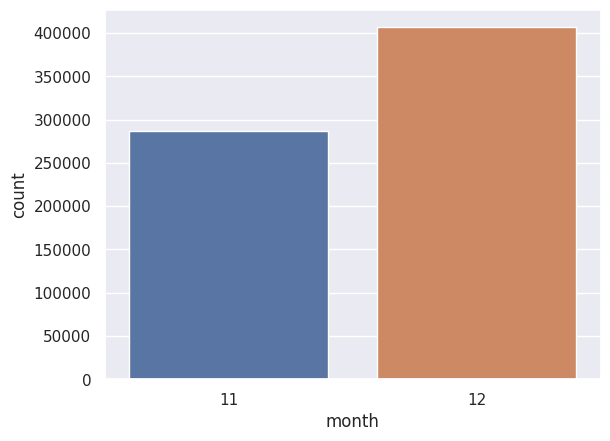

In [ ]:
# Countplot for month feature
sns.countplot(x='month', data=df)
plt.show()

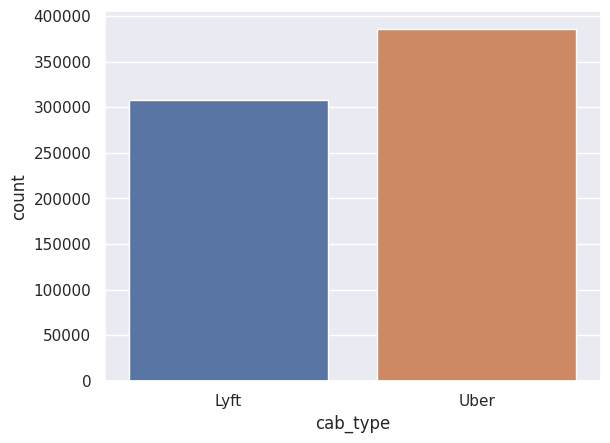

In [ ]:
# Countplot for cab type feature
sns.countplot(x='cab_type', data=df)
plt.show()

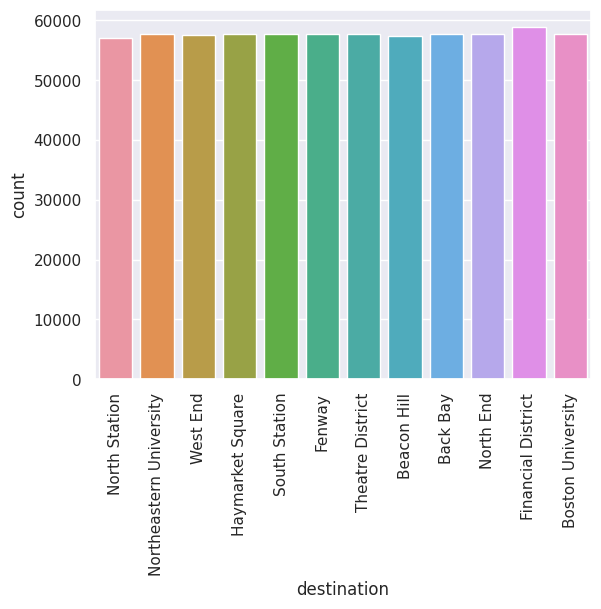

In [ ]:
# Countplot for month feature
sns.countplot(x='destination', data=df)
plt.xticks(rotation=90)
plt.show()

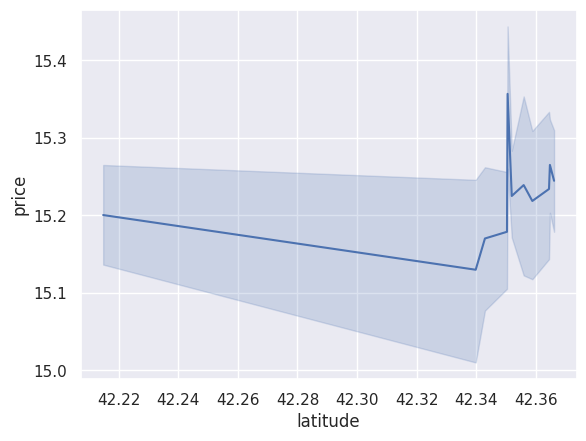

In [ ]:
# lineplot for latitude and price feature
sns.lineplot(x="latitude",y="price",data=df)
plt.show()

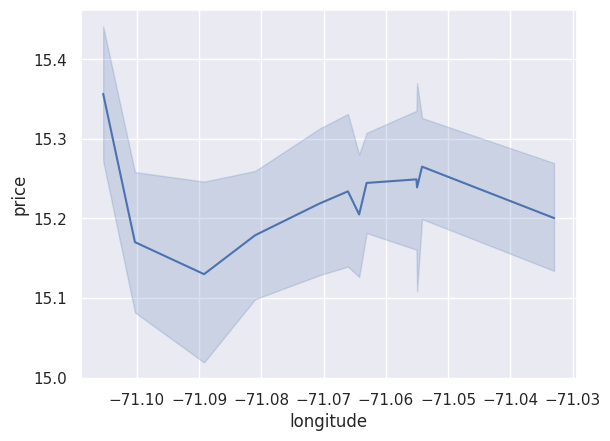

In [ ]:
# lineplot for longitude and price feature
sns.lineplot(x="longitude",y="price",data=df)
plt.show()

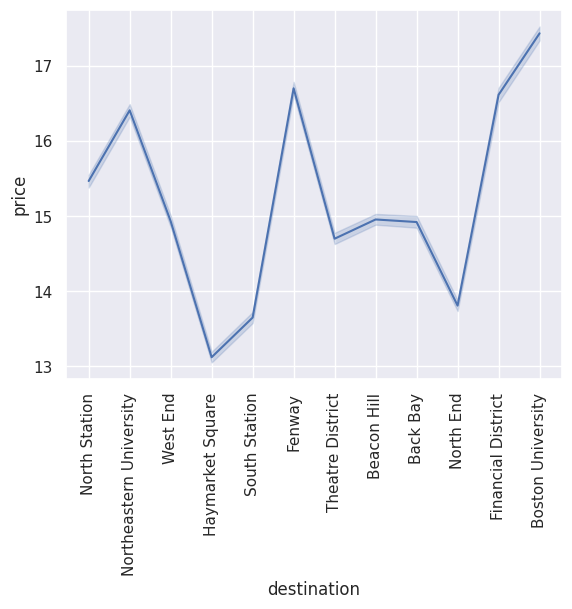

In [ ]:
# lineplot for destination and price feature
sns.lineplot(x="destination",y="price",data=df)
plt.xticks(rotation=90)
plt.show()

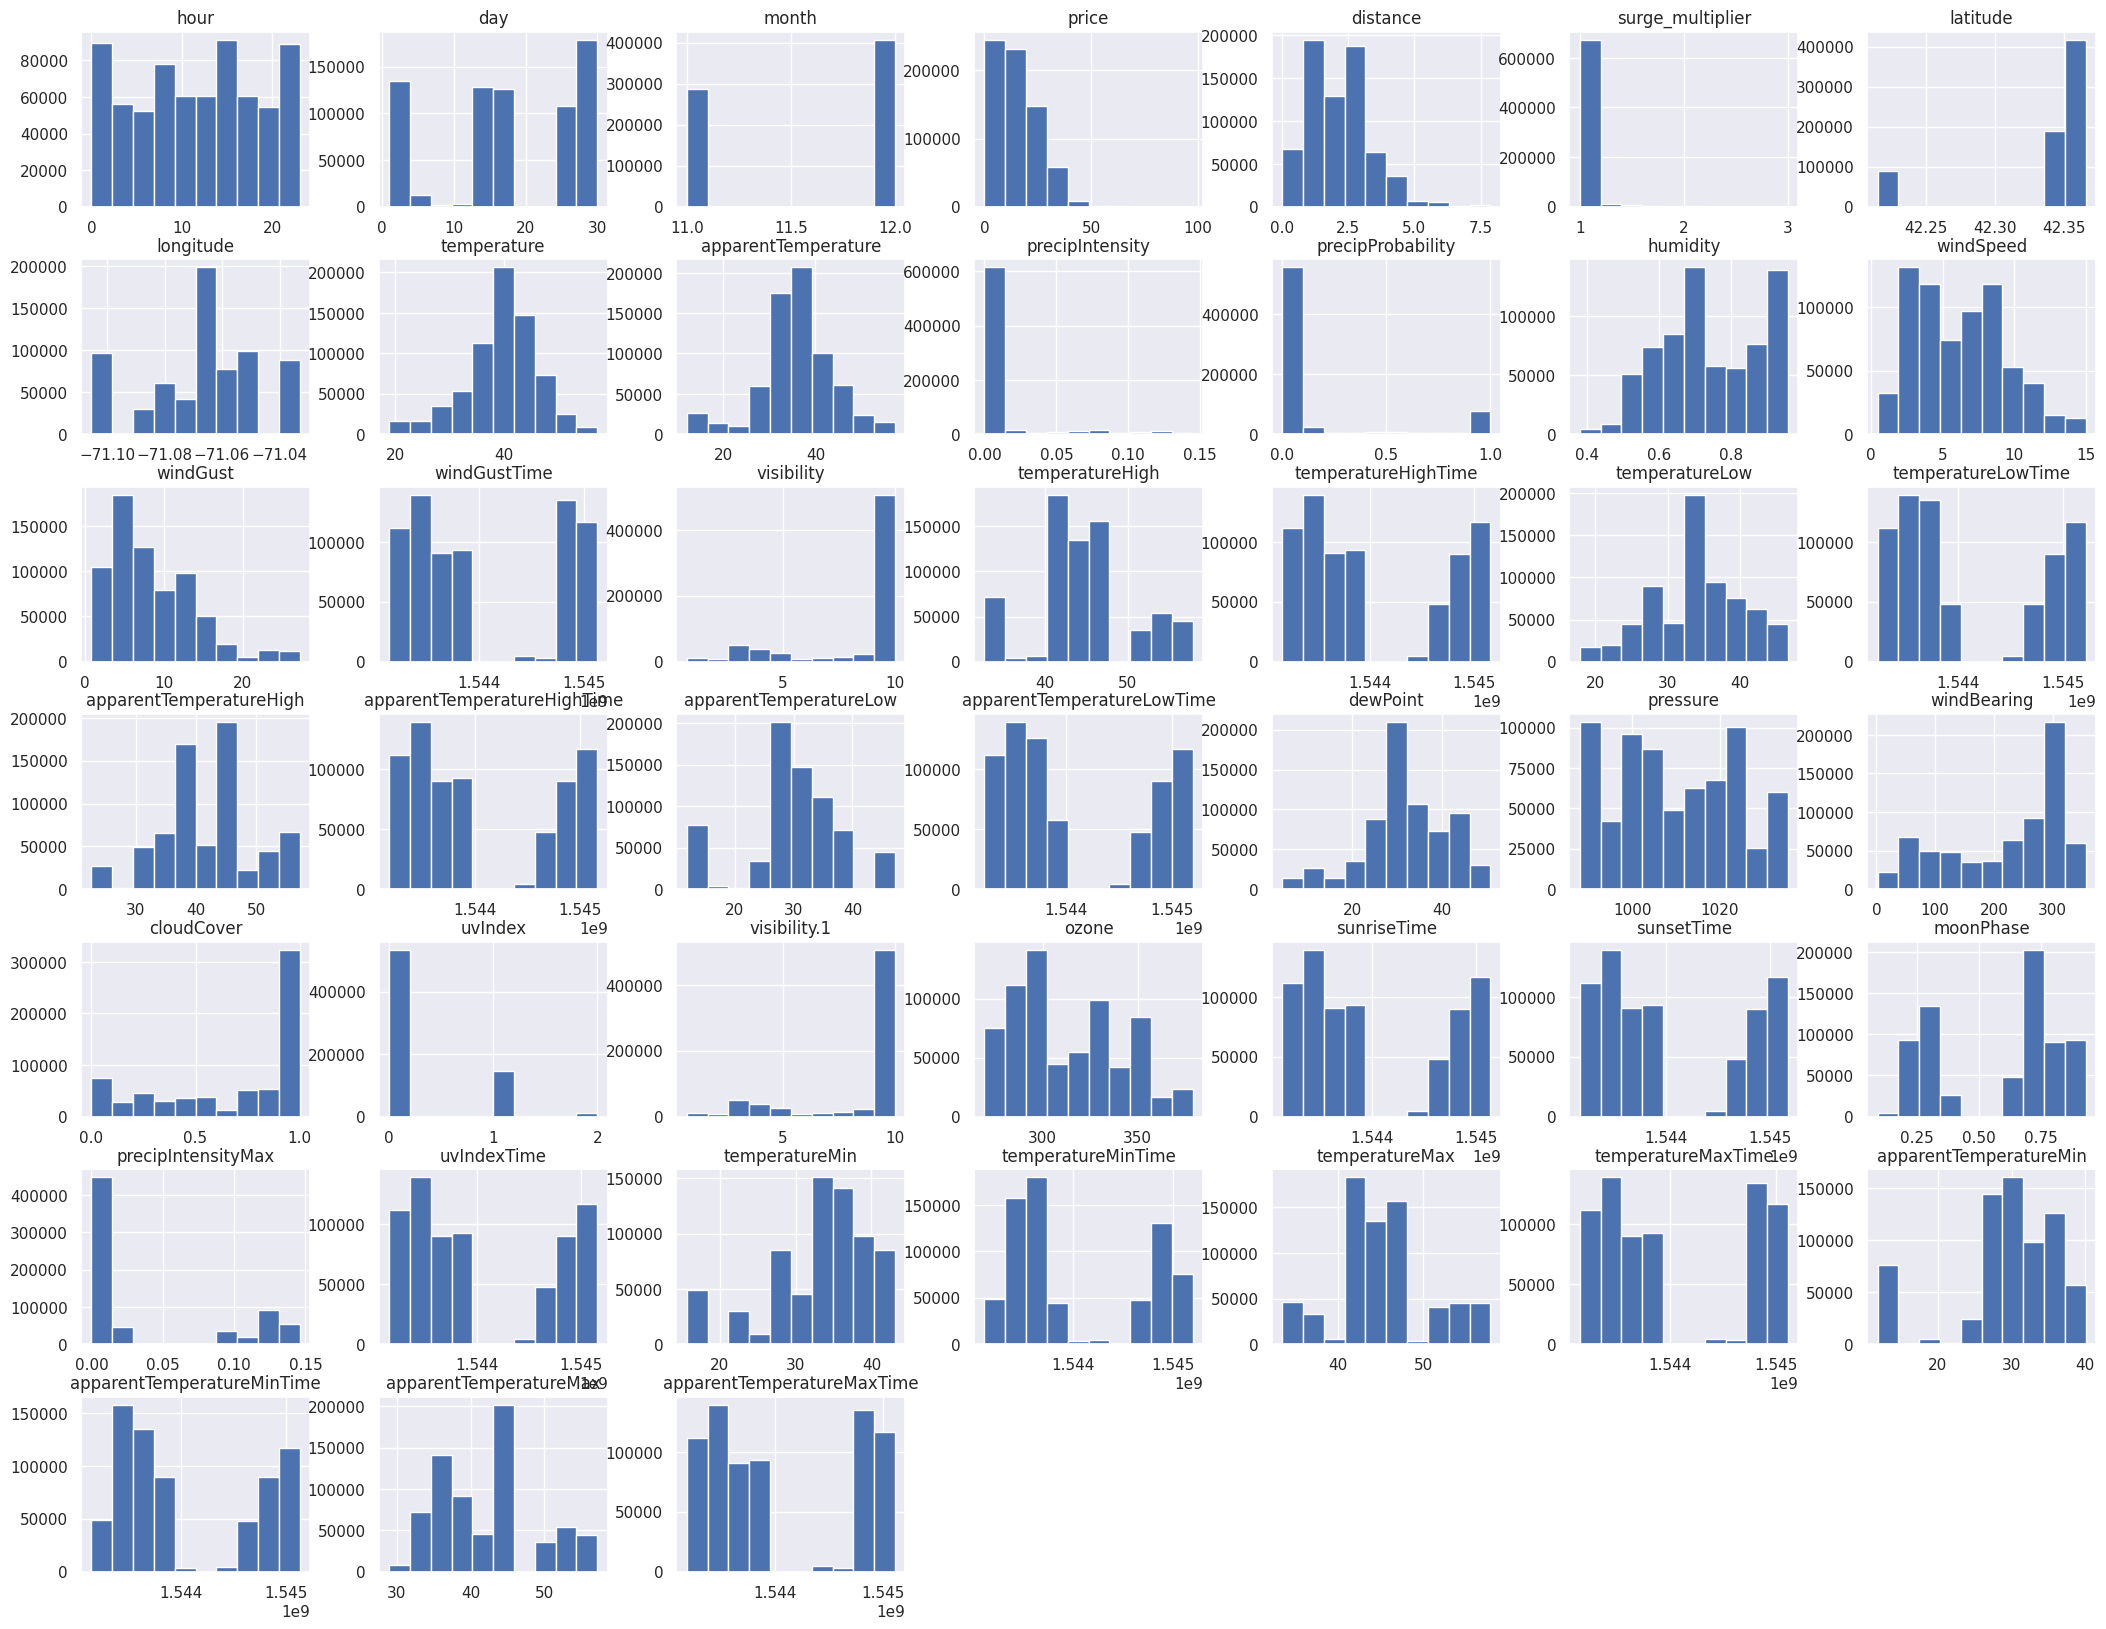

In [ ]:
# Using histogram to understand dataset data better
df.hist(figsize=(26,20));

# Unsupervised Learning - Predicting High Booking Areas

In [ ]:
pickup_coords = df[['latitude', 'longitude']]

# Perform clustering using K-means algorithm
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pickup_coords)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Get cluster labels for each data point
cluster_labels = kmeans.labels_

In [ ]:
cluster_labels

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

# Supervised Learning - Estimating Prices

## Data preprocessing

In [ ]:
cat_cols = [x for x in df.select_dtypes(exclude=np.number)]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,5,7,0,8,7,5.0,0.44,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,5,7,0,12,2,11.0,0.44,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,5,7,0,7,5,7.0,0.44,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,5,7,0,10,4,26.0,0.44,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,5,7,0,11,6,9.0,0.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         693071 non-null  int64  
 1   day                          693071 non-null  int64  
 2   month                        693071 non-null  int64  
 3   source                       693071 non-null  int64  
 4   destination                  693071 non-null  int64  
 5   cab_type                     693071 non-null  int64  
 6   product_id                   693071 non-null  int64  
 7   name                         693071 non-null  int64  
 8   price                        693071 non-null  float64
 9   distance                     693071 non-null  float64
 10  surge_multiplier             693071 non-null  float64
 11  latitude                     693071 non-null  float64
 12  longitude                    693071 non-null  float64
 13 

In [ ]:
features = df.drop('price',axis=1)
target = df['price']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Linear Regression

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict prices for test set
y_pred = model.predict(X_test)
y_pred

array([ 7.23503808, 14.57091745, 10.55683428, ...,  5.36536803,
       14.52080017, 24.29616239])

In [ ]:
# Evaluate the performance of the price estimation model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 53.56
Mean Absolute Error: 5.83


# Map Function

In [ ]:
# Create a map of Boston
from IPython.display import display

boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Add markers for high booking areas
for label in range(k):
    cluster_points = pickup_coords[cluster_labels == label]
    for idx, row in cluster_points.iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='red')).add_to(boston_map)

display(boston_map)